In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Assignment1

Mounted at /content/drive
/content/drive/MyDrive/Assignment1


# **3.1 Problem - 1:** Getting Started with Data Exploration

- Some Warm up Exercises:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Data Exploration and Understanding:

**• Dataset Overview:**

1. Load the dataset and display the first 10 rows.

In [ ]:
df = pd.read_csv('WHR-2024-5CS037.csv')
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.

In [ ]:
num_rows, num_columns = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 143
Number of columns: 9


3. List all the columns and their data types.

In [ ]:
df.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


**Basic Statistics:**

1. Calculate the mean, median, and standard deviation for the Score column.

In [ ]:
print(f"Mean of Happiness Score: {df['score'].mean():.2f}")
print(f"Median of Happiness Score: {df['score'].median():.2f}")
print(f"Standard Deviation of Happiness Score: {df['score'].std():.2f}")

Mean of Happiness Score: 5.53
Median of Happiness Score: 5.79
Standard Deviation of Happiness Score: 1.17


2. Identify the country with the highest and lowest happiness scores.

In [ ]:
highest_score_country = df.nlargest(1, 'score')['Country name'].values[0]
highest_score_value = df['score'].max()

lowest_score_country = df.nsmallest(1, 'score')['Country name'].values[0]
lowest_score_value = df['score'].min()

print(f"Country with the highest happiness score: {highest_score_country} ({highest_score_value})")
print(f"Country with the lowest happiness score: {lowest_score_country} ({lowest_score_value})")

Country with the highest happiness score: Finland (7.741)
Country with the lowest happiness score: Afghanistan (1.721)


**Missing Values:**

1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
print(df.isnull().sum()[df.isnull().sum()>0])

Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**Filtering and Sorting:**

1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [ ]:
filtered_df = df[df['score']>7.5]
print(filtered_df)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [ ]:
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
print(sorted_df.head(10))

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


**Adding New Columns:**

1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

In [ ]:
conditions = [
    (df['score'] < 4),
    (df['score'] <= 6),
    (df['score'] > 6)
]
choices = ['Low', 'Medium', 'High']
df['Happiness Category'] = np.select(conditions, choices, default='Unknown')

print("Countries with Score > 6:")
print(df[df['score'] > 6][['Country name', 'score', 'Happiness Category']].head(3))

print("\nCountries with Score between 4 and 6:")
print(df[(df['score'] > 4) & (df['score'] <= 6)][['Country name', 'score', 'Happiness Category']].head(3))

print("\nCountries with Score < 4:")
print(df[df['score'] < 4][['Country name', 'score', 'Happiness Category']].head(3))

Countries with Score > 6:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High

Countries with Score between 4 and 6:
   Country name  score Happiness Category
56     Paraguay  5.977             Medium
57     Thailand  5.976             Medium
58     Malaysia  5.975             Medium

Countries with Score < 4:
    Country name  score Happiness Category
126        Egypt  3.977                Low
127    Sri Lanka  3.898                Low
128   Bangladesh  3.886                Low


# **2. Data Visualizations:**


• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

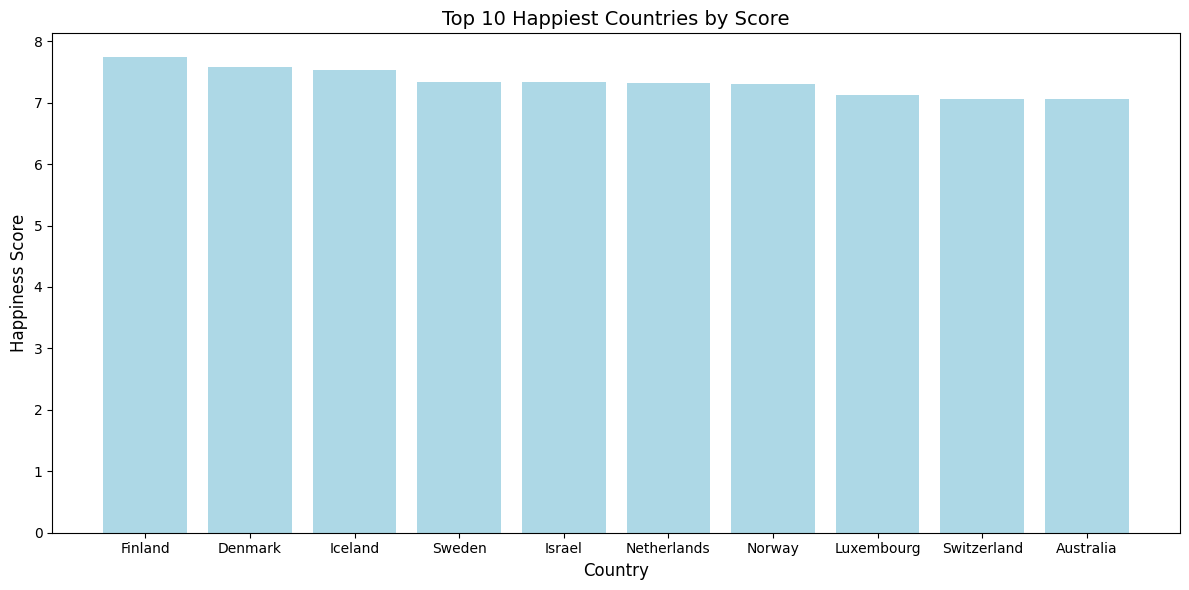

In [ ]:
top_10_df = df.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_df['Country name'], top_10_df['score'], color='lightblue')

plt.title('Top 10 Happiest Countries by Score', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)


plt.tight_layout()
plt.show()

Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

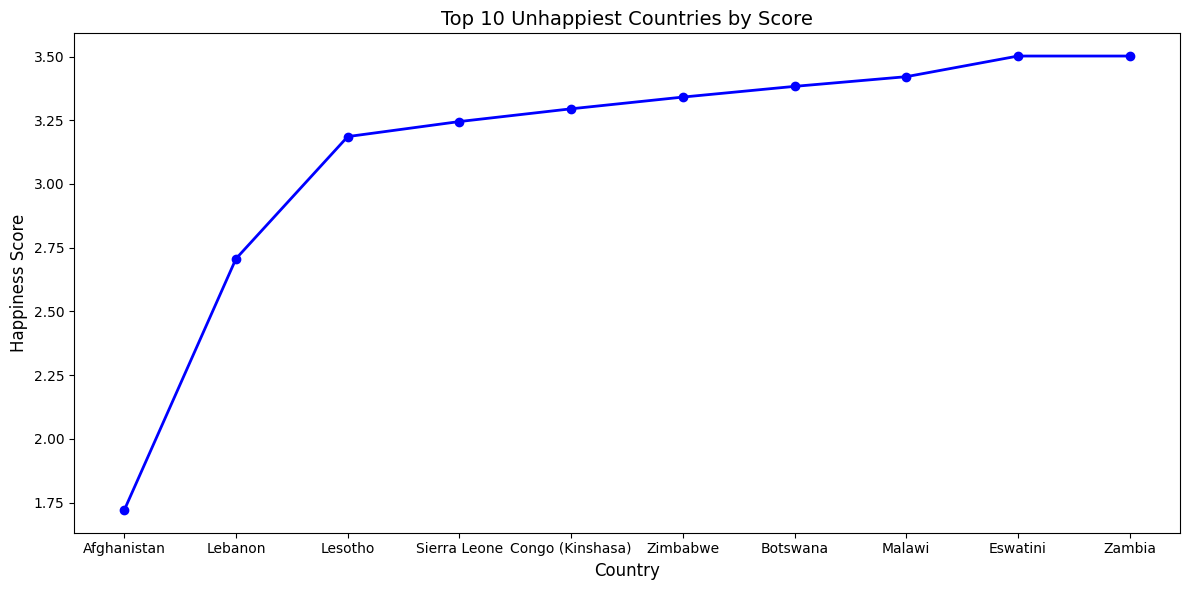

In [ ]:
bottom_10_df = df.sort_values(by='score').head(10)

plt.figure(figsize=(12, 6))
plt.plot(bottom_10_df['Country name'], bottom_10_df['score'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)

plt.title('Top 10 Unhappiest Countries by Score', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)


plt.tight_layout()
plt.show()

Plot a histogram for the Score column to show its distribution and also interpret.

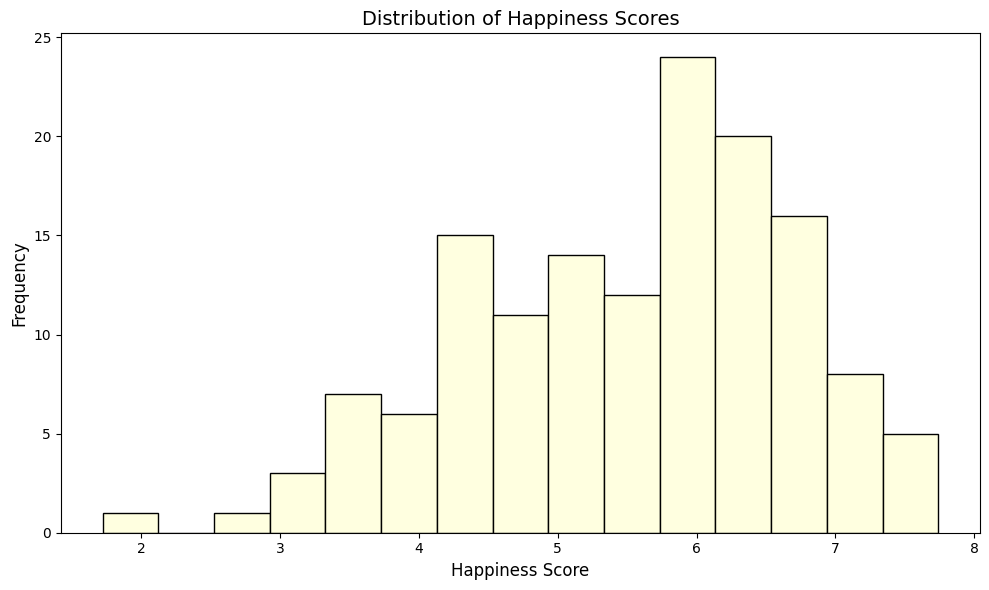

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=15, color='lightyellow', edgecolor='black')

plt.title('Distribution of Happiness Scores', fontsize=14)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

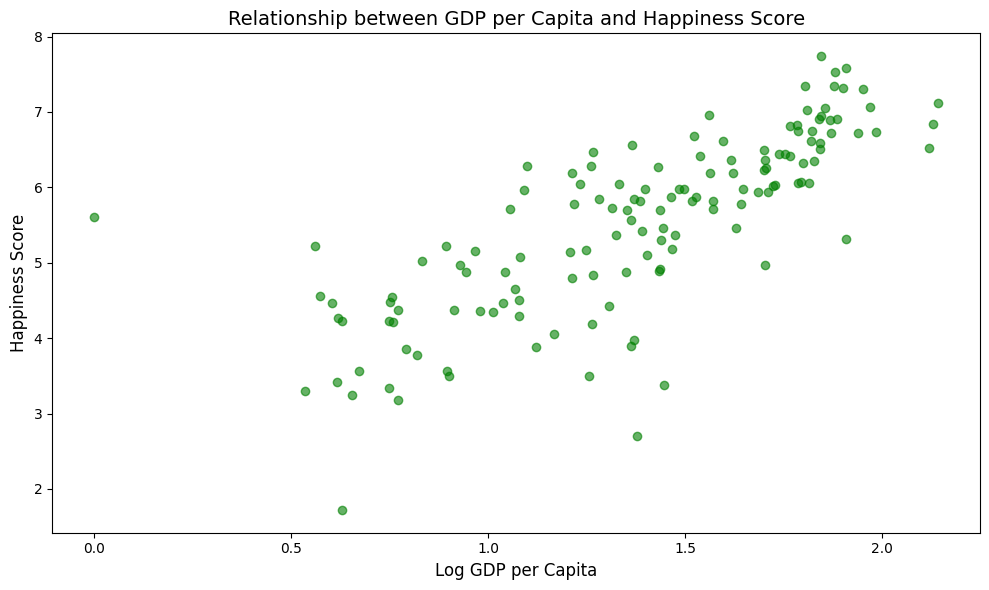

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['score'], color='green', alpha=0.6)

plt.title('Relationship between GDP per Capita and Happiness Score', fontsize=14)
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

plt.tight_layout()
plt.show()

# **3.2 Problem - 2 - Some Advance Data Exploration Task:**


Task - 1 - Setup Task - Preparing the South-Asia Dataset:

Steps:

1. Define the countries in South Asia with a list for example:

south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]

In [ ]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [ ]:
south_asian_df = df[df['Country name'].isin(south_asian_countries)]

3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
south_asian_df.to_csv('south_asian_happiness_data.csv', index=False)
south_asian_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low


# **Task - 2 - Composite Score Ranking**:

Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support+ 0.30 × Healthy Life Expectancy

In [ ]:
south_asian_df.loc[:, 'Composite Score'] = (
    0.40 * south_asian_df['Log GDP per capita'] +
    0.30 * south_asian_df['Social support'] +
    0.30 * south_asian_df['Healthy life expectancy']
)

<ipython-input-19-ca914ec6a69c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_df.loc[:, 'Composite Score'] = (


2. Rank the South Asian countries based on the Composite Score in descending order.

In [ ]:
south_asian_df = south_asian_df.sort_values(by='Composite Score', ascending=False)
south_asian_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

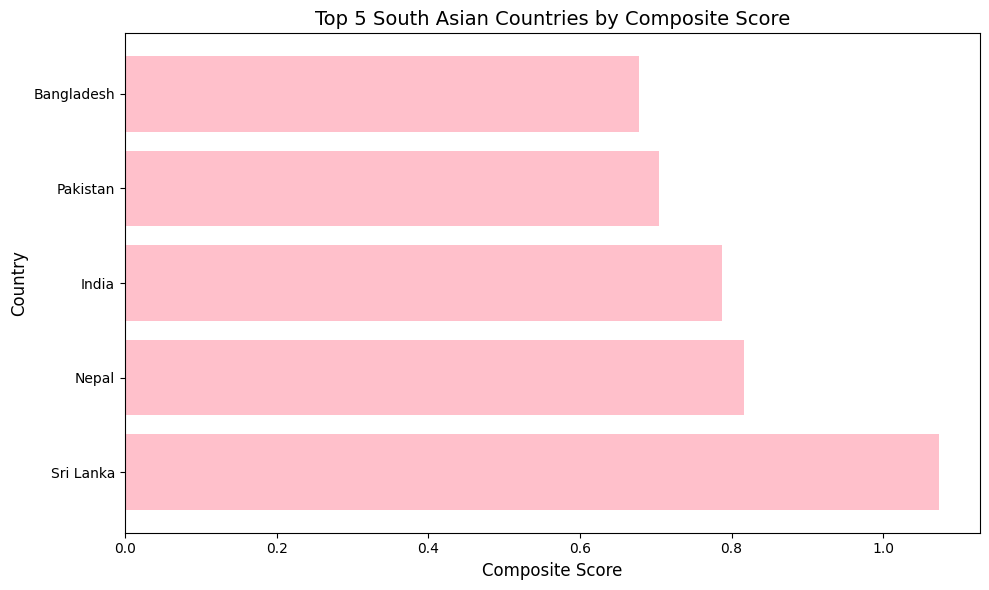

In [ ]:
top_5_composite = south_asian_df.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_composite['Country name'], top_5_composite['Composite Score'], color='pink')

plt.title('Top 5 South Asian Countries by Composite Score', fontsize=14)
plt.xlabel('Composite Score', fontsize=12)
plt.ylabel('Country', fontsize=12)

plt.tight_layout()
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

The Composite Score and the Original Happiness Score rankings are often similar because they are influenced by common factors like GDP per capita, social support, and healthy life expectancy. However, there are key differences between the two.

The Happiness Score includes subjective factors like personal freedom, perceptions of corruption, and overall life satisfaction. In contrast, the Composite Score focuses only on measurable economic and social data. Because of this, the results can sometimes differ.

For example, a country with a high GDP but low perceived freedom or high corruption might have a high Composite Score but a low Happiness Score. To see the differences clearly, a bar plot or scatter plot can be used to compare how countries rank based on both scores.

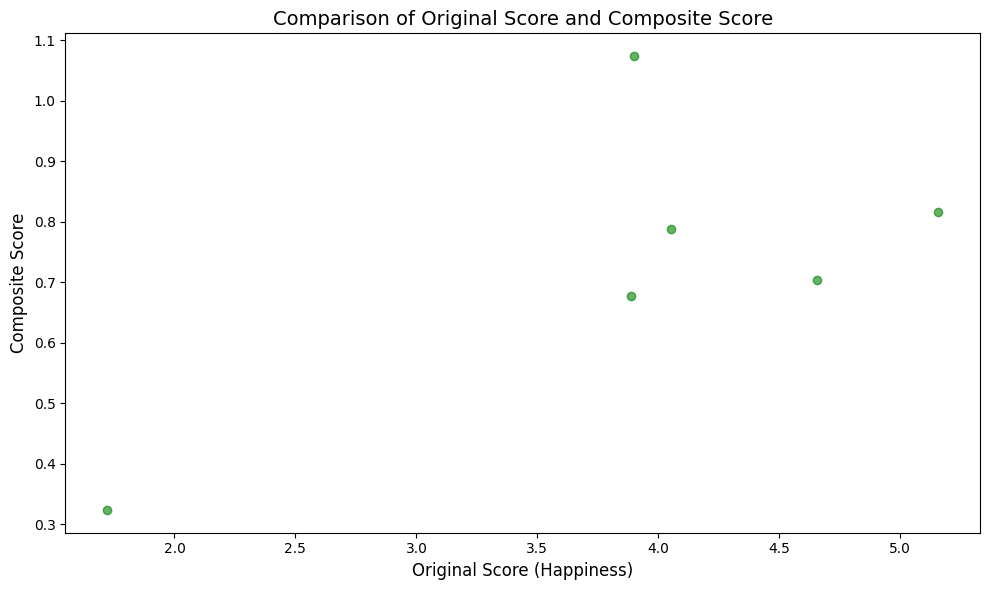

    Country name  score  Composite Score
127    Sri Lanka  3.898           1.0739
92         Nepal  5.158           0.8159
125        India  4.054           0.7874
107     Pakistan  4.657           0.7039
128   Bangladesh  3.886           0.6774


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(south_asian_df['score'], south_asian_df['Composite Score'], color='green', alpha=0.6)

plt.title('Comparison of Original Score and Composite Score', fontsize=14)
plt.xlabel('Original Score (Happiness)', fontsize=12)
plt.ylabel('Composite Score', fontsize=12)

plt.tight_layout()
plt.show()

print(south_asian_df[['Country name', 'score', 'Composite Score']].head())

# **Task - 3 - Outlier Detection:**


Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

2. Define outliers using the 1.5 × IQR rule.

We will identify outlier countries in South Asia based on Score (Happiness Score) and GDP per Capita using the 1.5 × IQR rule.

The Interquartile Range (IQR) is the range between the 25th percentile (Q1) and the 75th percentile (Q3). According to the 1.5 × IQR rule, any data points that are:

Below
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR or

Above
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

score_outliers = detect_outliers_iqr(south_asian_df, 'score')
gdp_outliers = detect_outliers_iqr(south_asian_df, 'Log GDP per capita')

print("Outlier countries based on Score:\n", score_outliers[['Country name', 'score']])
print("\nOutlier countries based on GDP per Capita:\n", gdp_outliers[['Country name', 'Log GDP per capita']])

Outlier countries based on Score:
     Country name  score
142  Afghanistan  1.721

Outlier countries based on GDP per Capita:
     Country name  Log GDP per capita
142  Afghanistan               0.628


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

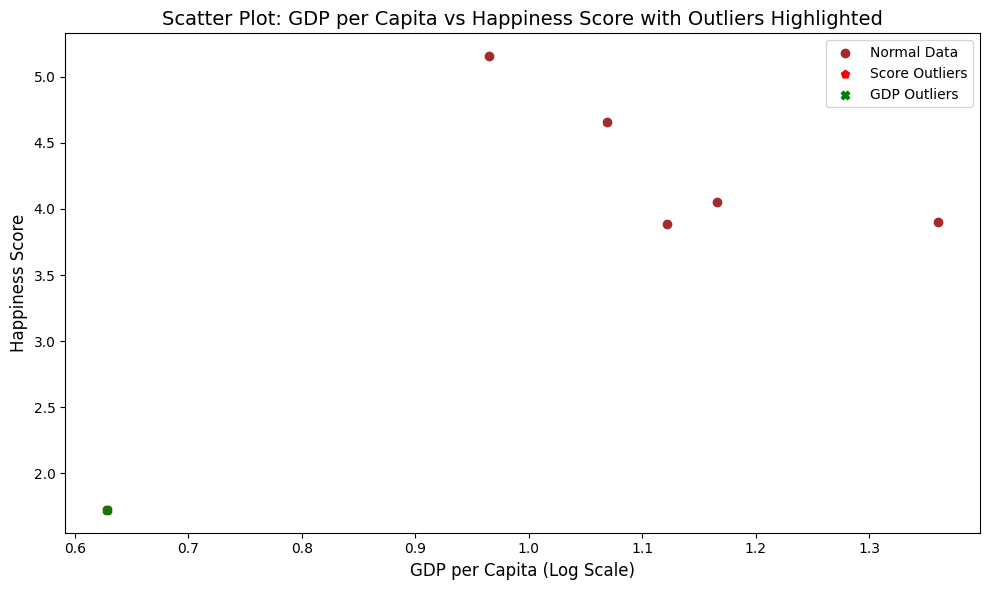

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(south_asian_df['Log GDP per capita'], south_asian_df['score'], color='brown', label='Normal Data')

plt.scatter(score_outliers['Log GDP per capita'], score_outliers['score'], color='red', label='Score Outliers', marker='p')
plt.scatter(gdp_outliers['Log GDP per capita'], gdp_outliers['score'], color='green', label='GDP Outliers', marker='X')

plt.title('Scatter Plot: GDP per Capita vs Happiness Score with Outliers Highlighted', fontsize=14)
plt.xlabel('GDP per Capita (Log Scale)', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

plt.legend()
plt.tight_layout()
plt.show()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

Outliers in the South Asian dataset, identified based on GDP per capita and Happiness Score, reveal key insights into regional disparities. Extreme values, such as Bhutan’s high happiness score despite a low GDP and India’s significant GDP coupled with lower happiness scores, can distort overall averages. These anomalies suggest that smaller nations may disproportionately influence happiness rankings and highlight that high GDP does not necessarily equate to greater happiness. As these outliers can skew regional averages, it is essential to account for them in analyses to avoid misleading conclusions about the overall prosperity and economic development in South Asia.

# **Task - 4 - Exploring Trends Across Metrics:**


Tasks:


1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [ ]:
freedom_corr = south_asian_df['Freedom to make life choices'].corr(south_asian_df['score'])

generosity_corr = south_asian_df['Generosity'].corr(south_asian_df['score'])

print(f"Correlation between Freedom to Make Life Choices and Score: {freedom_corr:.2f}")
print(f"Correlation between Generosity and Score: {generosity_corr:.2f}")

Correlation between Freedom to Make Life Choices and Score: 0.80
Correlation between Generosity and Score: 0.87


2. Create scatter plots with trendlines for these metrics against the Score.

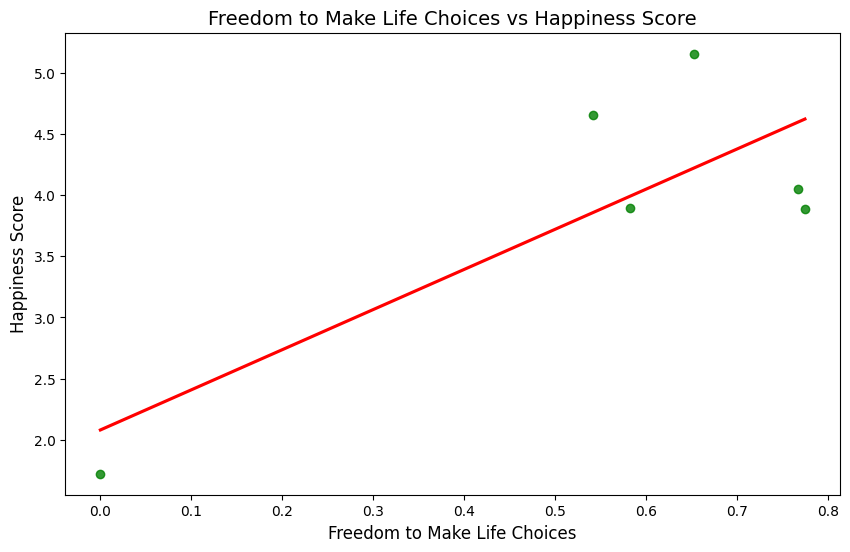

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_df, scatter_kws={'color':'green'}, line_kws={'color':'red'}, ci=None)
plt.title('Freedom to Make Life Choices vs Happiness Score', fontsize=14)
plt.xlabel('Freedom to Make Life Choices', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.show()

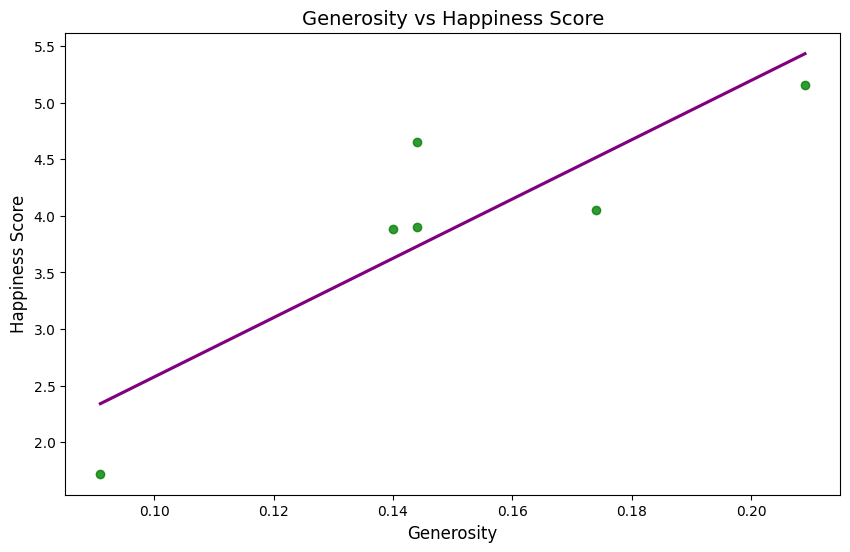

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asian_df, scatter_kws={'color':'green'}, line_kws={'color':'purple'}, ci=None)
plt.title('Generosity vs Happiness Score', fontsize=14)
plt.xlabel('Generosity', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

Correlation analysis reveals varying degrees of association between Generosity, Freedom to Make Life Choices, and the Happiness Score in South Asian nations. A stronger positive correlation is observed between Happiness Score and Freedom to Make Life Choices, indicating that countries with greater personal freedom tend to have happier citizens. In contrast, Generosity often displays a weaker or insignificant correlation with Happiness Score, suggesting that while generosity is valued, it may not significantly influence happiness rankings in the region. This supports the idea that factors such as economic stability and personal freedom may have a more direct impact on happiness compared to social behaviors like charity.

# **Task - 5 - Gap Analysis:**


Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [ ]:
south_asian_df['GDP-Score Gap'] = south_asian_df['Log GDP per capita'] - south_asian_df['score']

2. Rank the South Asian countries by this gap in both ascending and descending order.

In [ ]:
ascending_gap = south_asian_df.sort_values(by='GDP-Score Gap', ascending=True)

descending_gap = south_asian_df.sort_values(by='GDP-Score Gap', ascending=False)

3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

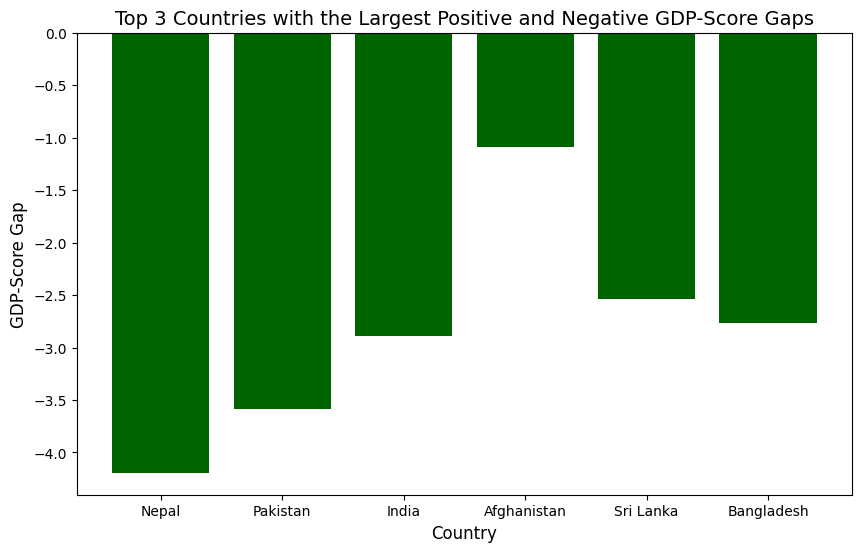

In [ ]:
top_positive_gap = descending_gap.head(3)
top_negative_gap = ascending_gap.head(3)

top_gap = pd.concat([top_negative_gap, top_positive_gap])

plt.figure(figsize=(10, 6))
plt.bar(top_gap['Country name'], top_gap['GDP-Score Gap'], color=['green' if gap > 0 else 'darkgreen' for gap in top_gap['GDP-Score Gap']])
plt.ylabel('GDP-Score Gap', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.title('Top 3 Countries with the Largest Positive and Negative GDP-Score Gaps', fontsize=14)

plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.


Some nations manage to achieve relatively high levels of well-being or life satisfaction despite economic hardships. Factors such as strong social support, a sense of belonging, familial networks, and cultural traits that foster happiness beyond financial prosperity contribute to this phenomenon. Additionally, high levels of freedom, security, and a strong sense of identity or purpose significantly enhance individual well-being. However, the gap between economic status and happiness suggests that economic development must improve to better meet public needs. For South Asia, this means that while social and cultural factors play a significant role in boosting happiness, greater economic growth, improved job opportunities, and higher living standards are essential. Policymakers should aim to create an environment where social and economic development complement each other to enhance overall well-being.

# **3.3 Problem - 3 - Comparative Analysis:**


**Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:**


Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:

middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

In [ ]:
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

Complete the following task:

**1. Descriptive Statistics:**

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

In [ ]:
print(f"The mean of the score for South Asia is: {south_asian_df['score'].mean():.2f}")
print(f"The standard deviation of the score for South Asia is: {south_asian_df['score'].std():.2f}")

print(f"\nThe mean of the score for Middle East is: {middle_east_df['score'].mean():.2f}")
print(f"The standard deviation of the score for Middle East is: {middle_east_df['score'].std():.2f}")

The mean of the score for South Asia is: 3.90
The standard deviation of the score for South Asia is: 1.18

The mean of the score for Middle East is: 5.41
The standard deviation of the score for Middle East is: 1.57



The analysis clearly shows that Middle Eastern nations have higher average happiness scores compared to South Asian countries. This difference can be attributed to several factors, including the higher GDP per capita in countries like Saudi Arabia, the UAE, and Qatar, which is closely linked to better access to social services, healthcare, and education, ultimately contributing to higher happiness scores.

**2. Top and Bottom Performers:**

• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

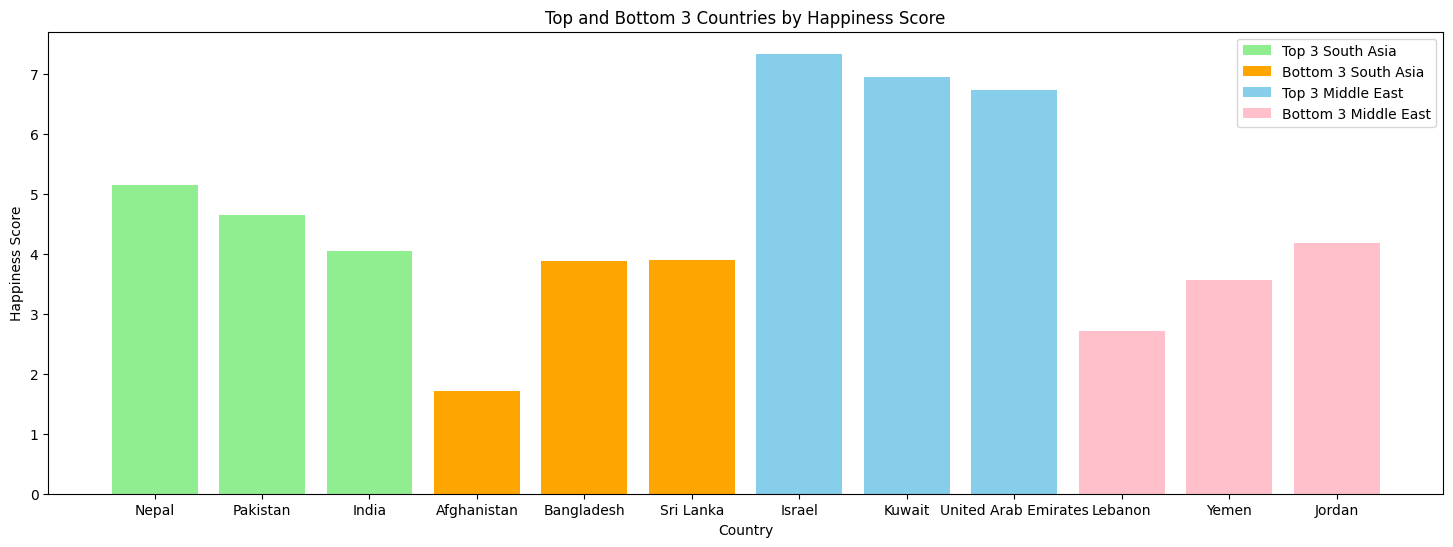

In [ ]:
south_asian_top_3 = south_asian_df.nlargest(3, 'score')
south_asian_bottom_3 = south_asian_df.nsmallest(3, 'score')

middle_east_top_3 = middle_east_df.nlargest(3, 'score')
middle_east_bottom_3 = middle_east_df.nsmallest(3, 'score')

plt.figure(figsize=(18, 6))
plt.bar(south_asian_top_3['Country name'], south_asian_top_3['score'], color='lightgreen', label='Top 3 South Asia')
plt.bar(south_asian_bottom_3['Country name'], south_asian_bottom_3['score'], color='orange', label='Bottom 3 South Asia')
plt.bar(middle_east_top_3['Country name'], middle_east_top_3['score'], color='skyblue', label='Top 3 Middle East')
plt.bar(middle_east_bottom_3['Country name'], middle_east_bottom_3['score'], color='pink', label='Bottom 3 Middle East')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top and Bottom 3 Countries by Happiness Score')
plt.legend()
plt.show()

**3. Metric Comparisons:**

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.


• Which metrics show the largest disparity between the two regions?

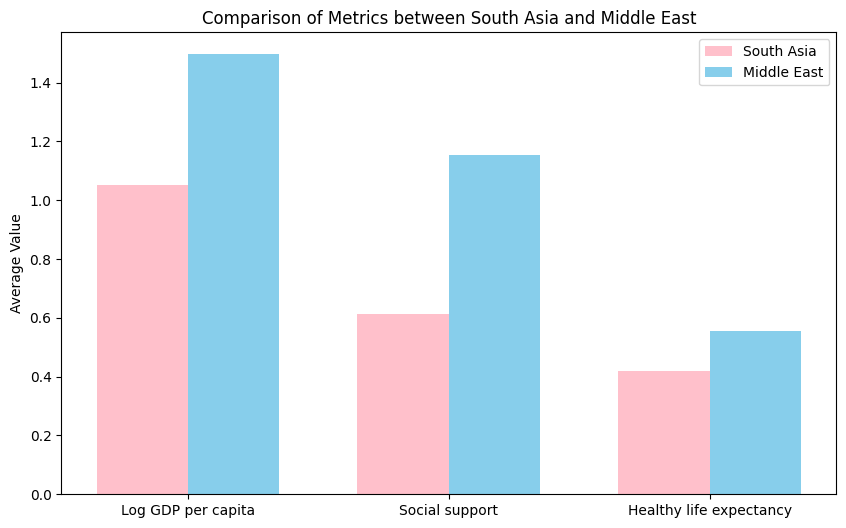

In [ ]:
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asian_metrics = south_asian_df[metrics].mean()
middle_east_metrics = middle_east_df[metrics].mean()

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, south_asian_metrics, width, label='South Asia', color='pink')
bars2 = ax.bar(x + width/2, middle_east_metrics, width, label='Middle East', color='skyblue')

ax.set_ylabel('Average Value')
ax.set_title('Comparison of Metrics between South Asia and Middle East')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

The biggest difference is in social support. People in this region say they have more help from their communities, friends, and family when needed. On the other hand, South Asia's lower score might be because of weaker social systems, less access to services, or fewer people feeling supported by those around them.

**4. Happiness Disparity:**

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [ ]:
south_asia_range = south_asian_df['score'].max() - south_asian_df['score'].min()
south_asia_mean = south_asian_df['score'].mean()
south_asia_std = south_asian_df['score'].std()
south_asia_cv = south_asia_std / south_asia_mean * 100

middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()
middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()
middle_east_cv = middle_east_std / middle_east_mean * 100

print(f"South Asia - Range: {south_asia_range:.2f}, CV: {south_asia_cv:.2f}%")
print(f"Middle East - Range: {middle_east_range:.2f}, CV: {middle_east_cv:.2f}%")

South Asia - Range: 3.44, CV: 30.21%
Middle East - Range: 4.63, CV: 28.94%


Although the Middle East has a wider range of happiness scores, South Asia has a higher Coefficient of Variation (CV). This means that compared to their average happiness score, South Asia shows more variation in happiness levels. In simple terms, South Asia has greater relative differences in happiness, while the Middle East's differences are larger in absolute terms.








**5. Correlation Analysis:**

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

South Asia - Correlation between Score and Freedom to Make Life Choices: 0.80
South Asia - Correlation between Score and Generosity: 0.87
Middle East - Correlation between Score and Freedom to Make Life Choices: 0.86
Middle East - Correlation between Score and Generosity: 0.63




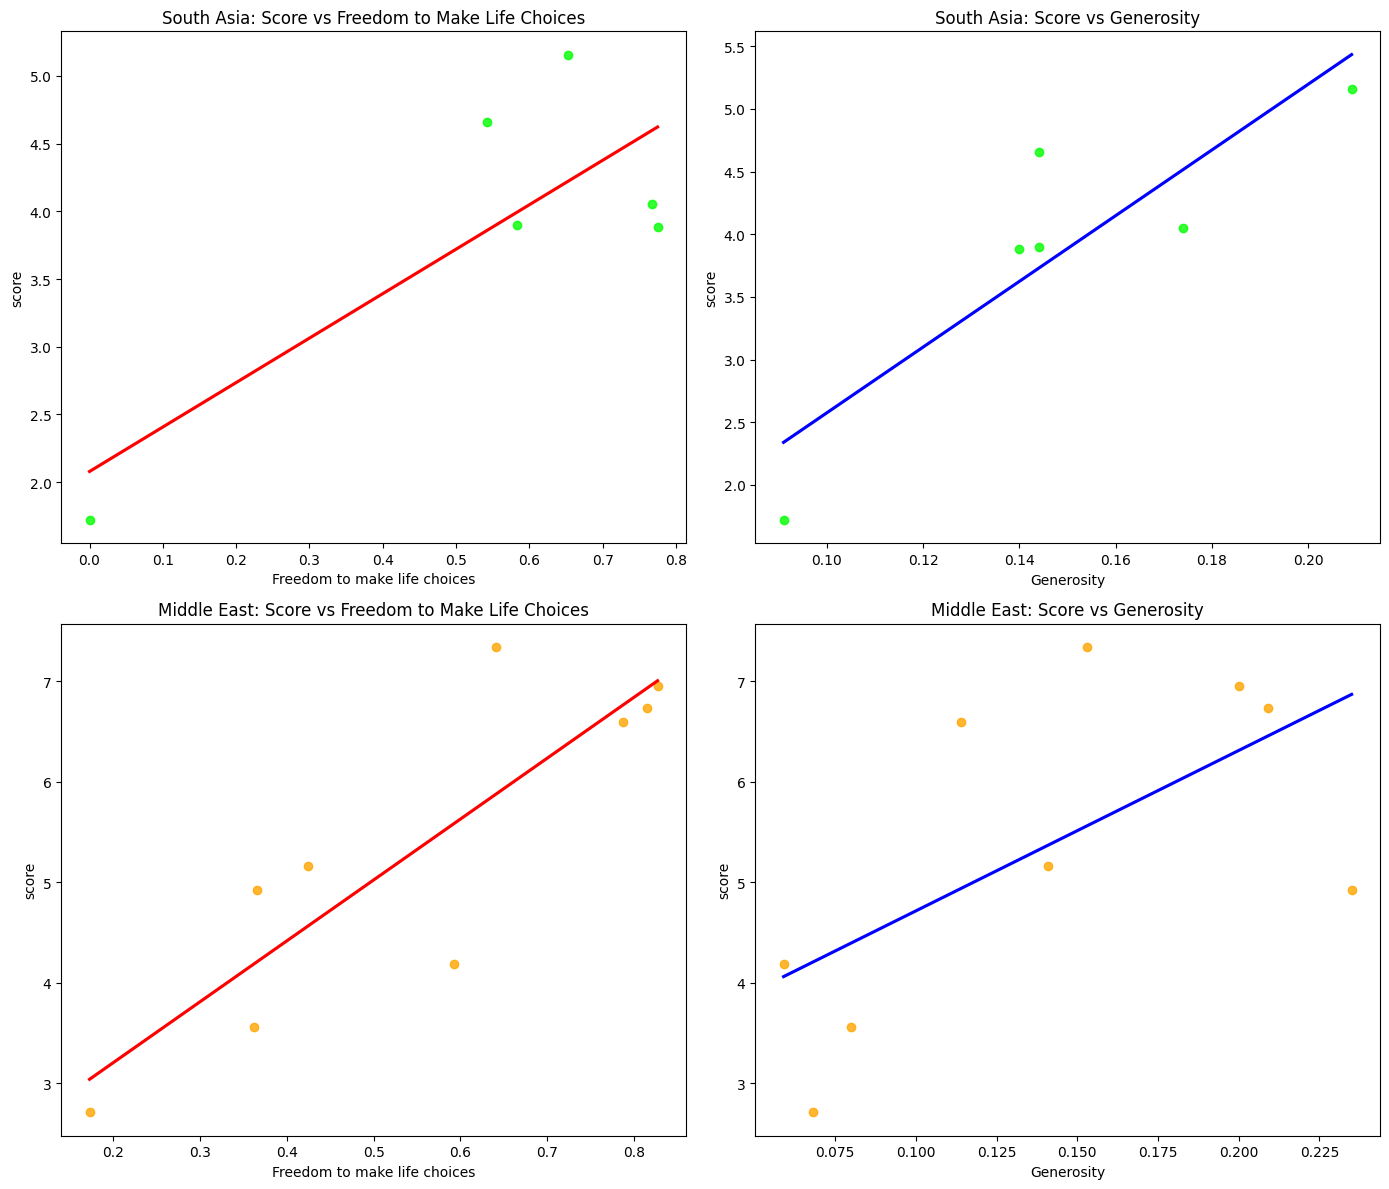

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

south_asia_freedom_corr = south_asian_df['score'].corr(south_asian_df['Freedom to make life choices'])
south_asia_generosity_corr = south_asian_df['score'].corr(south_asian_df['Generosity'])

middle_east_freedom_corr = middle_east_df['score'].corr(middle_east_df['Freedom to make life choices'])
middle_east_generosity_corr = middle_east_df['score'].corr(middle_east_df['Generosity'])

print(f"South Asia - Correlation between Score and Freedom to Make Life Choices: {south_asia_freedom_corr:.2f}")
print(f"South Asia - Correlation between Score and Generosity: {south_asia_generosity_corr:.2f}")
print(f"Middle East - Correlation between Score and Freedom to Make Life Choices: {middle_east_freedom_corr:.2f}")
print(f"Middle East - Correlation between Score and Generosity: {middle_east_generosity_corr:.2f}\n\n")

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.regplot(
    x='Freedom to make life choices',
    y='score',
    data=south_asian_df,
    ax=axes[0, 0],
    scatter_kws={'color': 'lime'},
    line_kws={'color': 'red'},
    ci=None
)
axes[0, 0].set_title('South Asia: Score vs Freedom to Make Life Choices', fontsize=12)

sns.regplot(
    x='Generosity',
    y='score',
    data=south_asian_df,
    ax=axes[0, 1],
    scatter_kws={'color': 'lime'},
    line_kws={'color': 'blue'},
    ci=None
)
axes[0, 1].set_title('South Asia: Score vs Generosity', fontsize=12)

sns.regplot(
    x='Freedom to make life choices',
    y='score',
    data=middle_east_df,
    ax=axes[1, 0],
    scatter_kws={'color': 'orange'},
    line_kws={'color': 'red'},
    ci=None
)
axes[1, 0].set_title('Middle East: Score vs Freedom to Make Life Choices', fontsize=12)

sns.regplot(
    x='Generosity',
    y='score',
    data=middle_east_df,
    ax=axes[1, 1],
    scatter_kws={'color': 'orange'},
    line_kws={'color': 'blue'},
    ci=None
)
axes[1, 1].set_title('Middle East: Score vs Generosity', fontsize=12)

plt.tight_layout()
plt.show()



In South Asia, generosity has a very strong positive connection with happiness scores (0.87), showing that being generous greatly boosts happiness in this region. Similarly, there’s a strong link between happiness (Score) and Freedom to Make Life Choices (0.80), meaning that the more freedom people feel they have, the happier they tend to be.

In the Middle East, the link between happiness and Freedom to Make Life Choices is also strong (0.86), but slightly less impactful than in South Asia. On the other hand, the connection between happiness and generosity is weaker in the Middle East (0.63), suggesting that generosity doesn’t play as big a role in boosting happiness compared to South Asia.

Overall, while freedom strongly influences happiness in both regions, generosity has a much bigger effect on happiness in South Asia than in the Middle East.

**6. Outlier Detection:**

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

South Asia - Outlier countries based on Score:
     Country name  score
142  Afghanistan  1.721

South Asia - Outlier countries based on GDP per Capita:
     Country name  Log GDP per capita
142  Afghanistan               0.628

Middle East - Outlier countries based on Score:
 Empty DataFrame
Columns: [Country name, score]
Index: []

Middle East - Outlier countries based on GDP per Capita:
 Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


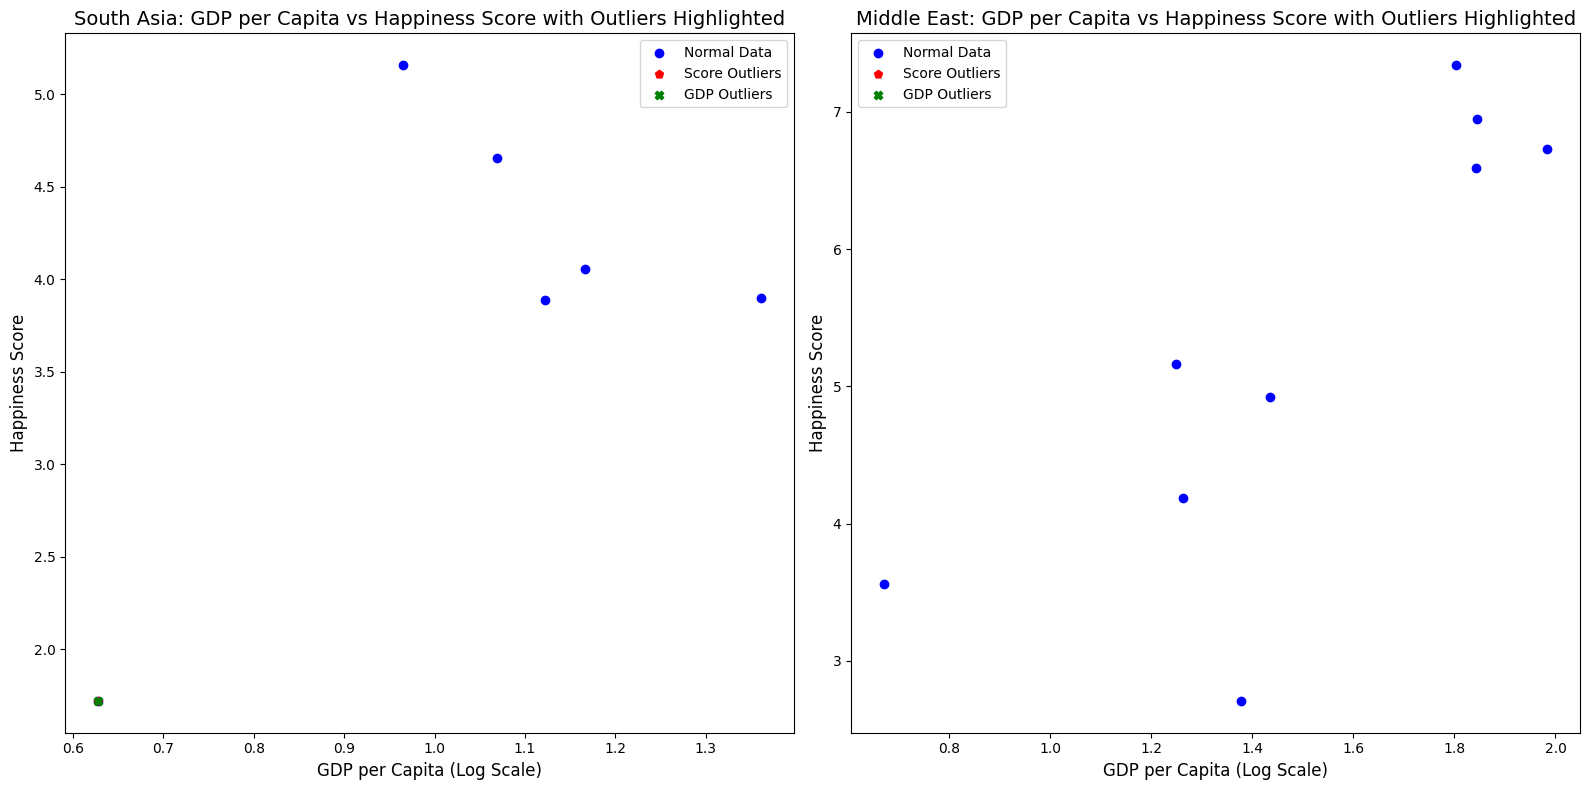

In [38]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Outliers for South Asia
south_asia_score_outliers = detect_outliers_iqr(south_asian_df, 'score')
south_asia_gdp_outliers = detect_outliers_iqr(south_asian_df, 'Log GDP per capita')

# Outliers for Middle East
middle_east_score_outliers = detect_outliers_iqr(middle_east_df, 'score')
middle_east_gdp_outliers = detect_outliers_iqr(middle_east_df, 'Log GDP per capita')

# Print results
print("South Asia - Outlier countries based on Score:\n", south_asia_score_outliers[['Country name', 'score']])
print("\nSouth Asia - Outlier countries based on GDP per Capita:\n", south_asia_gdp_outliers[['Country name', 'Log GDP per capita']])

print("\nMiddle East - Outlier countries based on Score:\n", middle_east_score_outliers[['Country name', 'score']])
print("\nMiddle East - Outlier countries based on GDP per Capita:\n", middle_east_gdp_outliers[['Country name', 'Log GDP per capita']])

# Scatter Plots for both regions
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# South Asia plot
axes[0].scatter(south_asian_df['Log GDP per capita'], south_asian_df['score'], color='blue', label='Normal Data')
axes[0].scatter(south_asia_score_outliers['Log GDP per capita'], south_asia_score_outliers['score'], color='red', label='Score Outliers', marker='p')
axes[0].scatter(south_asia_gdp_outliers['Log GDP per capita'], south_asia_gdp_outliers['score'], color='green', label='GDP Outliers', marker='X')
axes[0].set_title('South Asia: GDP per Capita vs Happiness Score with Outliers Highlighted', fontsize=14)
axes[0].set_xlabel('GDP per Capita (Log Scale)', fontsize=12)
axes[0].set_ylabel('Happiness Score', fontsize=12)
axes[0].legend()

# Middle East plot
axes[1].scatter(middle_east_df['Log GDP per capita'], middle_east_df['score'], color='blue', label='Normal Data')
axes[1].scatter(middle_east_score_outliers['Log GDP per capita'], middle_east_score_outliers['score'], color='red', label='Score Outliers', marker='p')
axes[1].scatter(middle_east_gdp_outliers['Log GDP per capita'], middle_east_gdp_outliers['score'], color='green', label='GDP Outliers', marker='X')
axes[1].set_title('Middle East: GDP per Capita vs Happiness Score with Outliers Highlighted', fontsize=14)
axes[1].set_xlabel('GDP per Capita (Log Scale)', fontsize=12)
axes[1].set_ylabel('Happiness Score', fontsize=12)
axes[1].legend()

plt.tight_layout()
plt.show()


**7. Visualization:**

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

In [ ]:
print(south_asian_df.isnull().sum())
print(middle_east_df.isnull().sum())

Country name                    0
score                           0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
Happiness Category              0
Composite Score                 0
GDP-Score Gap                   0
Region                          0
dtype: int64
Country name                    0
score                           0
Log GDP per capita              1
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      1
Perceptions of corruption       1
Dystopia + residual             1
Happiness Category              0
Region                          0
dtype: int64


In [ ]:
middle_east_df.loc[:, 'Log GDP per capita'] = middle_east_df['Log GDP per capita'].fillna(middle_east_df['Log GDP per capita'].mean())
middle_east_df.loc[:, 'Social support'] = middle_east_df['Social support'].fillna(middle_east_df['Social support'].mean())
middle_east_df.loc[:, 'Healthy life expectancy'] = middle_east_df['Healthy life expectancy'].fillna(middle_east_df['Healthy life expectancy'].mean())

<ipython-input-40-61d1b98d7bbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_df.loc[:, 'Region'] = 'Middle East'


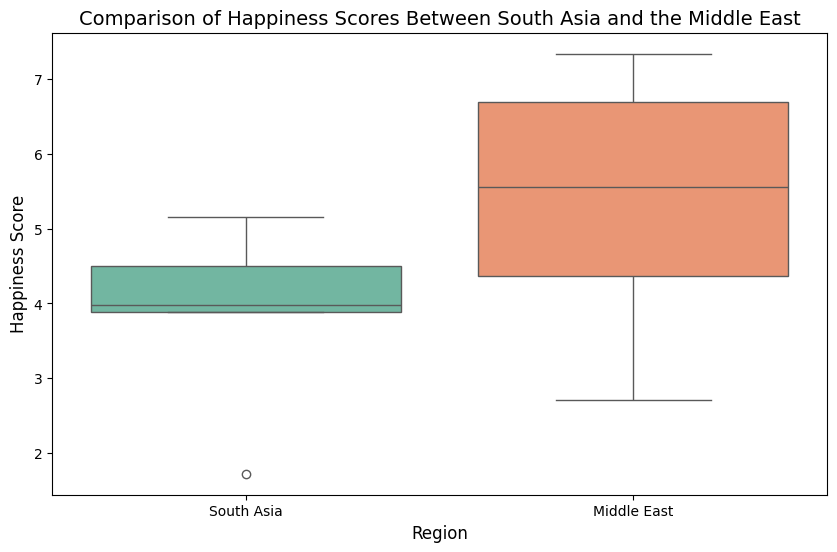

In [ ]:
south_asian_df.loc[:, 'Region'] = 'South Asia'
middle_east_df.loc[:, 'Region'] = 'Middle East'

combined_df = pd.concat([south_asian_df[['Country name', 'score', 'Region']],
                         middle_east_df[['Country name', 'score', 'Region']]])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df, palette='Set2', hue='Region')
plt.title('Comparison of Happiness Scores Between South Asia and the Middle East', fontsize=14)
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.show()


The box plot shows clear differences in the happiness scores between South Asia and the Middle East. The Middle East has a much higher median happiness score, meaning that, on average, people in this region are happier. South Asia, however, has a lower median score, indicating lower overall happiness levels in this region.

The size of the box in the Middle East shows a larger range of happiness scores, meaning there’s more variation between countries in the region. The whiskers, or the lines extending from the box, are also longer, showing that the happiness scores in the Middle East vary more widely. In contrast, South Asia’s box is smaller, meaning the scores are more tightly grouped around the median, with less variation. South Asia’s whiskers are shorter, which means most of the happiness scores are closer to the median.

An important point is that South Asia has some outliers, where a few countries have much lower happiness scores than the rest. This shows that some countries in South Asia have extremely low happiness levels compared to others. The Middle East, however, has no noticeable outliers, suggesting that there are no countries with unusually low or high happiness scores.

Overall, the Middle East has a higher median happiness score, more variation in scores, and no extreme outliers. South Asia, on the other hand, has a lower median score, less variation, and a few countries with very low happiness scores